In [55]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [56]:
import matplotlib.pyplot as mp
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.lines as mlines


font = {'size'   : 13}

matplotlib.rc('font', **font)


In [57]:
ho_df = pd.read_csv('h0_table.csv', names=('Program', 'Type', 'SubProgram', 'H0', 'eH0up', 'eH0down', 'Reference', 'month'))

In [58]:
### Remove all non-numeric characters from reference field to get year

ho_df['year'] = pd.to_numeric(ho_df['Reference'].str.extract('(\d+)', expand=False))

ho_df['decimal_year'] = ho_df.year+((ho_df.month)/12.)


In [59]:
ho_df['pre_planck'] = True
ho_df['pre_planck'][ho_df.year>2013] = False


/Users/vs522/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [60]:
ho_df

,Program,Type,SubProgram,H0,eH0up,eH0down,Reference,month,year,decimal_year,pre_planck
0,Hubble,Cepheid,Old,500.00,50.00,50.00,Hubble (1929),3,1929,1929.250000,True
1,HMS,Cepheid,Old,180.00,18.00,18.00,Humason Mayall & Sandage (1956),4,1956,1956.333333,True
2,S&T,Cepheid,Old,55.00,10.00,10.00,Sandage & Tammann (1970),12,1970,1971.000000,True
3,KP,Cepheid,PreferredValue,72.00,8.00,8.00,Freedman et al. (2001),5,2001,2001.416667,True
4,WMAP1,CMB,WMAPOne-Year,72.00,5.00,5.00,Spergel et al. (2003),9,2003,2003.750000,True
5,WMAP3,CMB,WMAPThree-YearMean,73.20,2.10,3.20,Spergel et al. (2007),6,2007,2007.500000,True
6,WMAP5,CMB,WMAPFive-YearMean,71.90,2.60,2.70,Dunkley et al. (2009),2,2009,2009.166667,True
7,SH_0E^2S,Cepheid,LMCAnchor,74.20,3.60,3.60,Riess et al. (2009),7,2009,2009.583333,True
8,SH_0ES,Cepheid,PreferredValue,73.80,2.40,2.40,Riess et al. (2011),4,2011,2011.333333,True
9,WMAP7,CMB,WMAPSeven-YearMean,70.40,2.50,2.50,Komatsu et al. (2011),2,2011,2011.166667,True


In [61]:
pre_planck = ho_df[ho_df.pre_planck==True]

In [62]:
mean_cep_pp = np.mean(pre_planck.H0[(pre_planck.Type=='Cepheid')])
N_cep_pp = len(pre_planck.H0[(pre_planck.Type=='Cepheid')])
err_cep_pp = np.std(pre_planck.H0[(pre_planck.Type=='Cepheid')]) / np.sqrt(N_cep_pp)
print(mean_cep_pp, err_cep_pp, N_cep_pp)



73.575 0.464186115691 4


In [63]:
mean_cep_ap = np.mean(ho_df.H0[(ho_df.Type=='Cepheid')])
N_cep_ap = len(ho_df.H0[(ho_df.Type=='Cepheid')])
err_cep_ap = np.std(ho_df.H0[(ho_df.Type=='Cepheid')]) / np.sqrt(N_cep_ap)
print(mean_cep_ap, err_cep_ap, N_cep_ap)

73.46000000000001 0.385331026521 5


In [64]:
mean_cmb_pp = np.mean(pre_planck.H0[(pre_planck.Type=='CMB')])
N_cmb_pp = len(pre_planck.H0[(pre_planck.Type=='CMB')])
err_cmb_pp = np.std(pre_planck.H0[(pre_planck.Type=='CMB')]) / np.sqrt(N_cmb_pp)
print(mean_cmb_pp, err_cmb_pp, N_cmb_pp)

71.5 0.52 5


In [65]:
mean_cmb_ap = np.mean(ho_df.H0[(ho_df.Type=='CMB')])
N_cmb_ap = len(ho_df.H0[(ho_df.Type=='CMB')])
err_cmb_ap = np.std(ho_df.H0[(ho_df.Type=='CMB')]) / np.sqrt(N_cmb_ap)
print(mean_cmb_ap, err_cmb_ap, N_cmb_ap)

69.985 0.765947126113 8


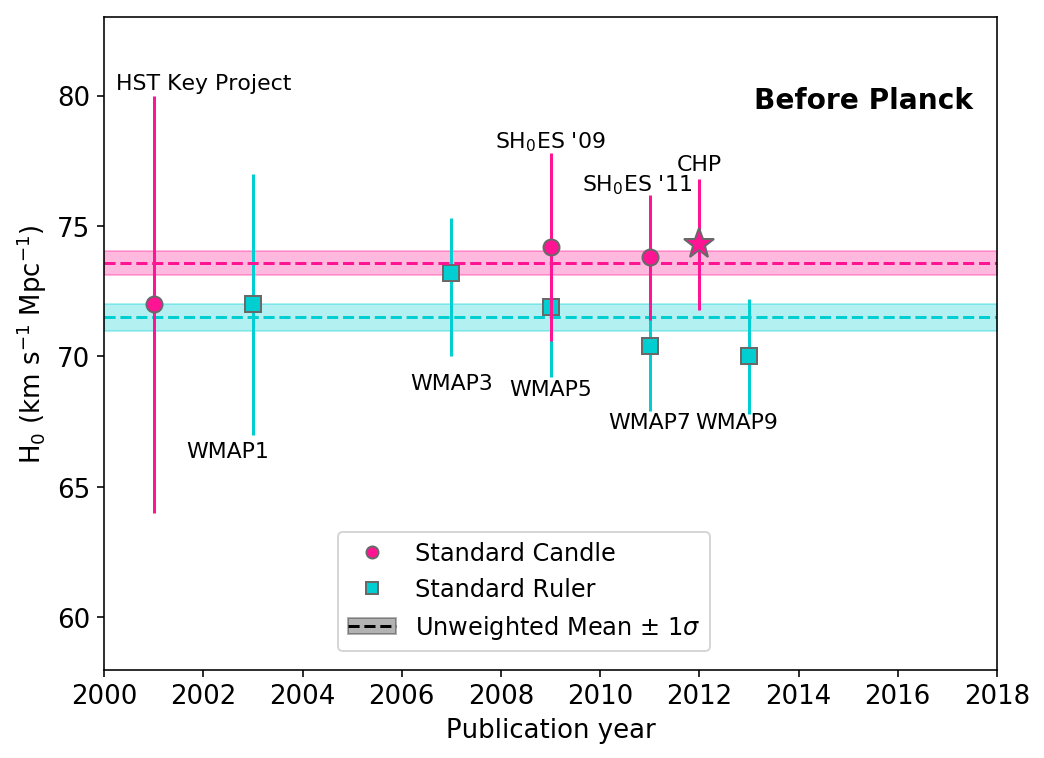

In [66]:
fig = mp.figure(figsize=(8,6))
axp1 = fig.add_subplot(111)

#z = randn(10)

#red_dot, = plt.plot(z, "ro", markersize=15)
# Put a white cross over some of the data.
#white_cross, = plt.plot(z[:5], "w+", markeredgewidth=3, markersize=15)

#plt.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])

x = np.arange(2000,2018,1)
y = np.ones(np.shape(x))*50


axp1.errorbar(pre_planck.year[pre_planck.Type=='CMB'], pre_planck.H0[pre_planck.Type=='CMB'], yerr=[pre_planck.eH0down[pre_planck.Type=='CMB'], pre_planck.eH0up[pre_planck.Type=='CMB']], ls='None', color='DarkTurquoise', label='')
axp1.plot(pre_planck.year[(pre_planck.Type=='CMB')], pre_planck.H0[(pre_planck.Type=='CMB')], ls='None', color='DarkTurquoise', mec='DimGray', marker='s', label='CMB modelling', ms=8)



axp1.errorbar(pre_planck.year[pre_planck.Type=='Cepheid'], pre_planck.H0[pre_planck.Type=='Cepheid'], yerr=[pre_planck.eH0down[pre_planck.Type=='Cepheid'], pre_planck.eH0up[pre_planck.Type=='Cepheid']], ls='None', color='DeepPink', zorder=4, label='')
axp1.plot(pre_planck.year[(pre_planck.Type=='Cepheid') & (pre_planck.Program!='CHP')], pre_planck.H0[(pre_planck.Type=='Cepheid') & (pre_planck.Program!='CHP')], ls='None', mfc='DeepPink', mec='DimGray', marker='o', zorder=4, label='Cepheids', ms=8)
axp1.plot(pre_planck.year[pre_planck.Program=='CHP'], pre_planck.H0[pre_planck.Program=='CHP'], ls='None', mfc='DeepPink', mec='DimGray', marker='*', label='', ms=16, zorder=4)



myaxis=[2000,2018,58,83]
axp1.axis(myaxis)

x = np.arange(2000,2019,1)

## mean pre-planck values

axp1.axhline(mean_cmb_pp, ls='--', color='DarkTurquoise')
axp1.fill_between(x, mean_cmb_pp-err_cmb_pp, mean_cmb_pp+err_cmb_pp, color='DarkTurquoise', alpha=0.3)

axp1.axhline(mean_cep_pp, ls='--', color='DeepPink')
axp1.fill_between(x, mean_cep_pp-err_cep_pp, mean_cep_pp+err_cep_pp, color='DeepPink', alpha=0.3)

mp.xlabel('Publication year')
mp.ylabel('H$_{0}$ (km s$^{-1}$ Mpc$^{-1}$)')

exline = axp1.axhline(50.0, ls='--', color='black')
exfill = axp1.axhspan(49.8, 50.2, 2000, 2017, color='black', alpha=0.3)

cmb = mlines.Line2D([], [], mfc='DarkTurquoise', mec='DimGray',marker='s', ls='None', label='Standard Rules')
cep = mlines.Line2D([], [], mfc='DeepPink', mec='DimGray', marker='o', ls='None', label='Standard Candle')


axp1.annotate('CHP', xy=(2012, 77.15), xycoords='data', ha='center', fontsize=11)

axp1.annotate('SH$_0$ES \'09', xy=(2009, 78), xycoords='data', ha='center', fontsize=11)
axp1.annotate('SH$_0$ES \'11', xy=(2010.75, 76.35), xycoords='data', ha='center', fontsize=11)

axp1.annotate('HST Key Project', xy=(2002, 80.25), xycoords='data', ha='center', fontsize=11)
axp1.annotate('WMAP1', xy=(2002.5, 66.15), xycoords='data', ha='center', fontsize=11)
axp1.annotate('WMAP3', xy=(2007, 68.75), xycoords='data', ha='center', fontsize=11)
axp1.annotate('WMAP5', xy=(2009, 68.5), xycoords='data', ha='center', fontsize=11)
axp1.annotate('WMAP7', xy=(2011, 67.25), xycoords='data', ha='center', fontsize=11)
axp1.annotate('WMAP9', xy=(2012.75, 67.25), xycoords='data', ha='center', fontsize=11)

axp1.annotate('Before Planck', xy=(2015.3, 79.5), xycoords='data', ha='center', fontsize=14, fontweight='bold')


axp1.legend(handles=[cep, cmb, (exfill, exline)], labels=['Standard Candle', 'Standard Ruler', 'Unweighted Mean $\\pm$ 1$\\sigma$', ], numpoints=1, fancybox=True, fontsize=12, loc=8, bbox_to_anchor=(0.47, 0.01,))


mp.savefig('Cepheids_vs_CMB_before_Planck.pdf', transparent=True, bbox_inches='tight')

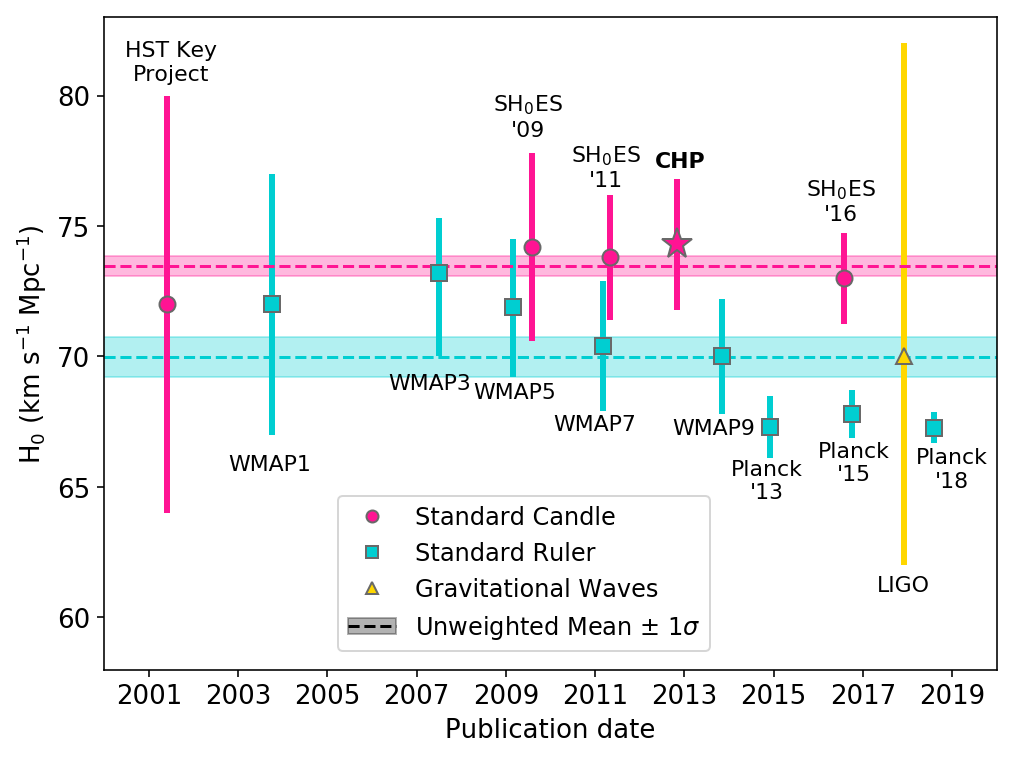

In [67]:
fig = mp.figure(figsize=(8,6))
axp1 = fig.add_subplot(111)

x = np.arange(2000,2018,1)
y = np.ones(np.shape(x))*50

myaxis=[2000,2020,58,83]
axp1.axis(myaxis)

x = np.arange(1900,2020.5,1)


mp.xlabel('Publication date')
mp.ylabel('H$_{0}$ (km s$^{-1}$ Mpc$^{-1}$)')

exline = axp1.axhline(50.0, ls='--', color='black')
exfill = axp1.axhspan(49.8, 50.2, 2000, 2017, color='black', alpha=0.3)


axp1.axhline(mean_cmb_ap, ls='--', color='DarkTurquoise')
axp1.fill_between(x, mean_cmb_ap-err_cmb_ap, mean_cmb_ap+err_cmb_ap, color='DarkTurquoise', alpha=0.3)

axp1.axhline(mean_cep_ap, ls='--', color='DeepPink')
axp1.fill_between(x, mean_cep_ap-err_cep_ap, mean_cep_ap+err_cep_ap, color='DeepPink', alpha=0.3)



axp1.errorbar(ho_df.decimal_year[(ho_df.Type!='Cepheid') & (ho_df.Type!='CMB')], ho_df.H0[(ho_df.Type!='Cepheid') & (ho_df.Type!='CMB')], yerr=[ho_df.eH0down[(ho_df.Type!='Cepheid') & (ho_df.Type!='CMB')], ho_df.eH0up[(ho_df.Type!='Cepheid') & (ho_df.Type!='CMB')]], ls='None', elinewidth=3, color='Gold', zorder=2, label='')

axp1.plot(ho_df.decimal_year[(ho_df.Type!='Cepheid') & (ho_df.Type!='CMB')], ho_df.H0[(ho_df.Type!='Cepheid') & (ho_df.Type!='CMB')], ls='None', mfc='Gold', mec='DimGray', marker='^', zorder=2, label='Others', ms=8)



axp1.errorbar(ho_df.decimal_year[ho_df.Type=='CMB'], ho_df.H0[ho_df.Type=='CMB'], yerr=[ho_df.eH0down[ho_df.Type=='CMB'], ho_df.eH0up[ho_df.Type=='CMB']], ls='None', color='DarkTurquoise', elinewidth=3, label='')
axp1.plot(ho_df.decimal_year[ho_df.Type=='CMB'], ho_df.H0[ho_df.Type=='CMB'], ls='None', color='DarkTurquoise', mec='DimGray', marker='s', label='CMB modelling', ms=8)



axp1.errorbar(ho_df.decimal_year[ho_df.Type=='Cepheid'], ho_df.H0[ho_df.Type=='Cepheid'], yerr=[ho_df.eH0down[ho_df.Type=='Cepheid'], ho_df.eH0up[ho_df.Type=='Cepheid']], ls='None', color='DeepPink', elinewidth=3, zorder=4, label='')

axp1.plot(ho_df.decimal_year[(ho_df.Type=='Cepheid') & (ho_df.Program!='CHP')], ho_df.H0[(ho_df.Type=='Cepheid') &  (ho_df.Program!='CHP')], ls='None', mfc='DeepPink', mec='DimGray', marker='o', zorder=4, label='Cepheids', ms=8)
axp1.plot(ho_df.decimal_year[ho_df.Program=='CHP'], ho_df.H0[ho_df.Program=='CHP'], ls='None', mfc='DeepPink', mec='DimGray', marker='*', label='', ms=16, zorder=4)




cmb = mlines.Line2D([], [], mfc='DarkTurquoise', mec='DimGray',marker='s', ls='None', label='CMB modelling')
cep = mlines.Line2D([], [], mfc='DeepPink', mec='DimGray', marker='o', ls='None', label='Cepheid')
oth = mlines.Line2D([], [], mfc='Gold', mec='DimGray',marker='^', ls='None', label='Others')



axp1.annotate('Planck\n\'13', xy=(2014.85, 64.55), xycoords='data', ha='center', fontsize=11)
axp1.annotate('Planck\n\'15', xy=(2016.8, 65.25), xycoords='data', ha='center', fontsize=11)

axp1.annotate('CHP', xy=(2012.9, 77.25), xycoords='data', ha='center', fontsize=11, weight="bold")

axp1.annotate('SH$_0$ES\n\'16', xy=(2016.5, 75.25), xycoords='data', ha='center', fontsize=11)
axp1.annotate('SH$_0$ES\n\'09', xy=(2009.5, 78.5), xycoords='data', ha='center', fontsize=11)
axp1.annotate('SH$_0$ES\n\'11', xy=(2011.25, 76.55), xycoords='data', ha='center', fontsize=11)

axp1.annotate('HST Key\nProject', xy=(2001.5, 80.6), xycoords='data', ha='center', fontsize=11)
axp1.annotate('WMAP1', xy=(2003.7, 65.65), xycoords='data', ha='center', fontsize=11)
axp1.annotate('WMAP3', xy=(2007.3, 68.75), xycoords='data', ha='center', fontsize=11)
axp1.annotate('WMAP5', xy=(2009.2, 68.4), xycoords='data', ha='center', fontsize=11)
axp1.annotate('WMAP7', xy=(2011, 67.15), xycoords='data', ha='center', fontsize=11)
axp1.annotate('WMAP9', xy=(2013.65, 67.), xycoords='data', ha='center', fontsize=11)
axp1.annotate('Planck\n\'18', xy=(2019, 65.0), xycoords='data', ha='center', fontsize=11)
axp1.annotate('LIGO', xy=(2017.9, 61.0), xycoords='data', ha='center', fontsize=11, zorder=4)

axp1.set_xticks([2001,2003,2005,2007,2009,2011,2013, 2015, 2017,2019])

axp1.legend(handles=[cep, cmb, oth, (exfill, exline)], labels=['Standard Candle', 'Standard Ruler', 'Gravitational Waves', 'Unweighted Mean $\\pm$ 1$\\sigma$', ], numpoints=1, fancybox=True, fontsize=12, loc=8, bbox_to_anchor=(0.47, 0.01,))

mp.savefig('Cepheids_vs_CMB_after_Planck.pdf', bbox_inches='tight')